<a href="https://colab.research.google.com/github/iamgarvit/diabetes_prediction/blob/main/diabetes_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving Diabetes Simple Diagnosis.csv to Diabetes Simple Diagnosis.csv


In [ ]:
file_path = next(iter(uploaded))
data = pd.read_csv(file_path)

#Renaming columns
data.columns = ['S.no', 'Age', 'Gender', 'BMI', 'High_BP', 'FBS', 'HbA1c_level', 'Smoking', 'Diagnosis']

In [ ]:
data.drop(columns=['S.no'], inplace=True)

gender_map = {'Male': 1, 'Female': 0, 'Other':-1}

for idx, row in data.iterrows():
    if row['Gender'] in gender_map:
        data.at[idx, 'Gender'] = gender_map[row['Gender']]

#We replace all empty data cells with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

#Splitting the dataset
X = data_imputed.drop(columns=['Diagnosis'])
y = data_imputed['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[15794   162]
 [  652  1068]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     15956
         1.0       0.87      0.62      0.72      1720

    accuracy                           0.95     17676
   macro avg       0.91      0.81      0.85     17676
weighted avg       0.95      0.95      0.95     17676

ROC AUC Score: 0.9560277317856664


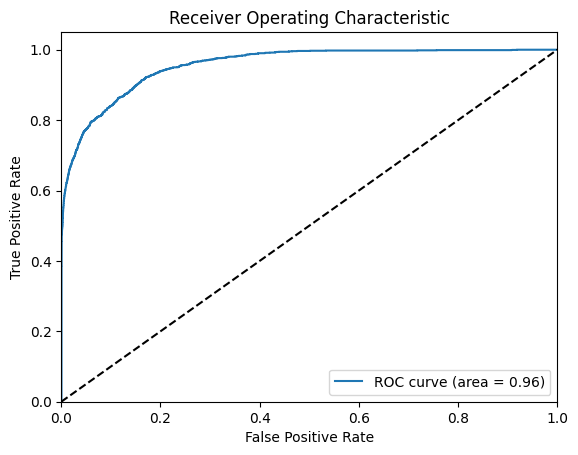

In [ ]:
#Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We use a logistic regression model due to multiple factors involved
model = LogisticRegression()
model.fit(X_train, y_train)

#Testing
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Calculating the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Uncomment and run below lines with desired output if you wish to test the
#model on any desired input of yours.

#sample_data = np.array([[1, 30, 28.1, 0, 105, 6.5, 0]])
#sample_data_scaled = scaler.transform(sample_data)
#sample_prediction = model.predict(sample_data_scaled)

#print(f'Prediction: {"Diabetic" if sample_prediction[0] == 1 else "Non-diabetic"}')